In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

In [23]:
data = pd.read_csv('winequality-white.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
start_time = time.time()

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)

bagging_pred = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_time = time.time() - start_time
print(bagging_time, bagging_accuracy)

1.7374391555786133 0.6969387755102041


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
boosting.fit(X_train, y_train)

boosting_pred = boosting.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
boosting_time = time.time() - start_time
print(boosting_time, bagging_accuracy)

3.3166260719299316 0.6969387755102041


In [29]:
comparison = pd.DataFrame({
    'Метод': ['Баггинг', 'Бустинг'],
    'Точность': [bagging_accuracy, boosting_accuracy],
    'Время выполнения (сек)': [bagging_time, boosting_time]
})
print(comparison)

     Метод  Точность  Время выполнения (сек)
0  Баггинг  0.696939                1.737439
1  Бустинг  0.574490                3.316626


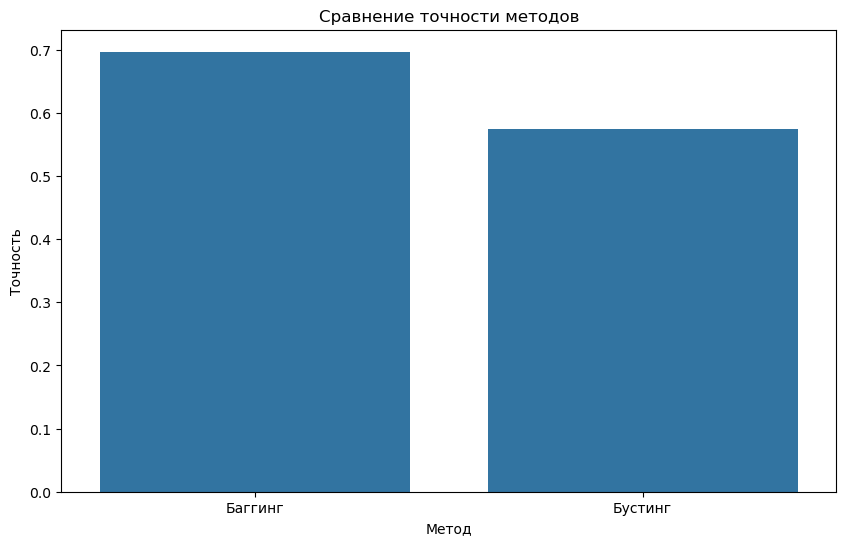

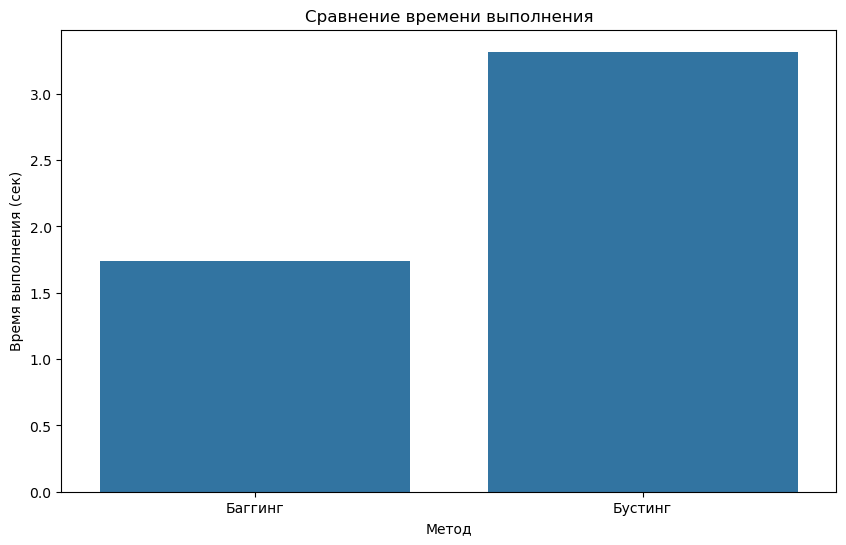

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison, x='Метод', y='Точность')
plt.title('Сравнение точности методов')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison, x='Метод', y='Время выполнения (сек)')
plt.title('Сравнение времени выполнения')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

bagging_scores = cross_val_score(bagging, X_train, y_train, cv=5)
boosting_scores = cross_val_score(boosting, X_train, y_train, cv=5)

print("Баггинг - средняя точность CV:", bagging_scores.mean())
print("Бустинг - средняя точность CV:", boosting_scores.mean())

Баггинг - средняя точность CV: 0.6536470143613
Бустинг - средняя точность CV: 0.5939277243464436
